<a href="https://colab.research.google.com/github/noushadkhan01/ML-and-DL-by-SuperDataScience/blob/master/Machine-Learning/Part%202%20-%20Regression/Section%205%20-%20Multiple%20Linear%20Regression/Multiple_Regressions_on_50_Startup_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('https://bit.ly/2QMQalG')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Evaluation Set

In [7]:
rng = np.random.RandomState(2)
l = 2 #no of rows we need
evaluation = df.loc[rng.randint(0, len(df), l)]
evaluation

,R&D Spend,Administration,Marketing Spend,State,Profit
40,28754.33,118546.05,172795.67,California,78239.91
15,114523.61,122616.84,261776.23,New York,129917.04


In [8]:
evaluation.index.values

array([40, 15])

In [9]:
df = df.drop(evaluation.index.values)
df.shape

(48, 5)

In [10]:
X = df.drop('Profit', axis = 1)
X.head(1)

,R&D Spend,Administration,Marketing Spend,State
0,165349.2,136897.8,471784.1,New York


## visualisation

In [0]:
import seaborn as sns

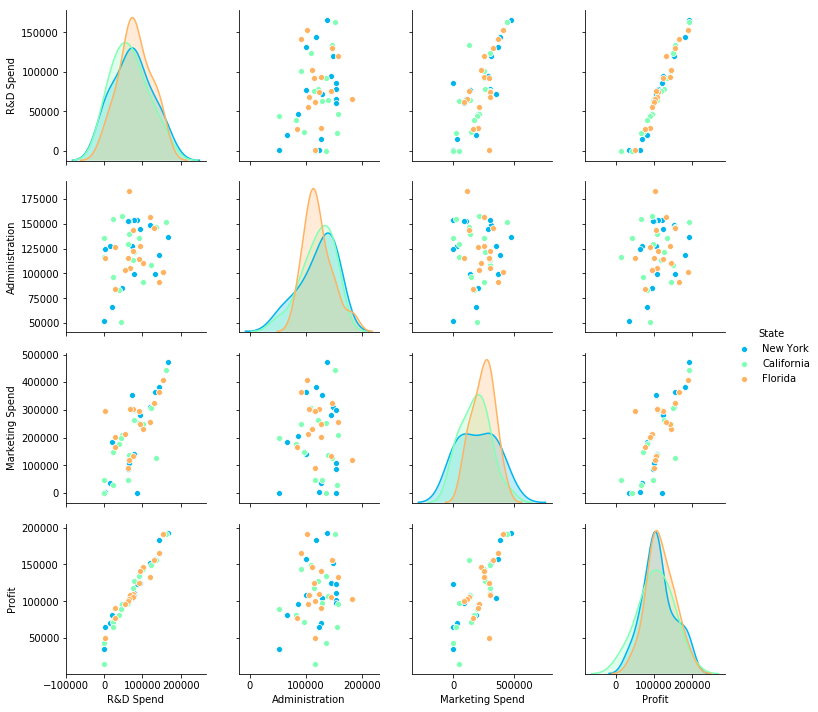

In [0]:
sns.pairplot(df,  palette = 'rainbow', hue = 'State')

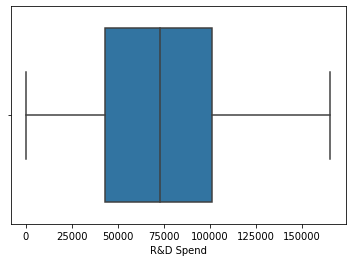

In [13]:
sns.boxplot('R&D Spend', data = df)

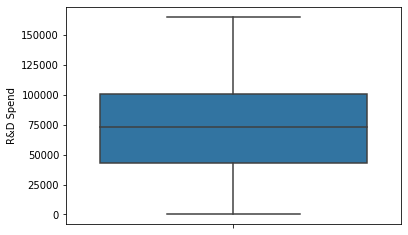

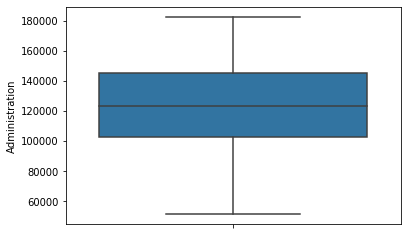

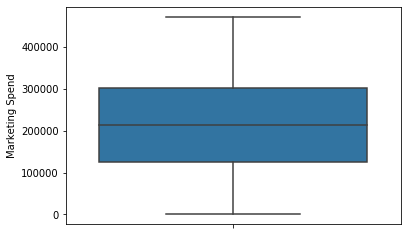

In [14]:
for i in df.columns[:-2]:
  sns.boxplot(y = i, data = df)
  plt.show()

## train_test_split

In [15]:
X = df.drop('Profit', 1)
X.head(1)

,R&D Spend,Administration,Marketing Spend,State
0,165349.2,136897.8,471784.1,New York


In [16]:
y = df.Profit
y[:2]

0    192261.83
1    191792.06
Name: Profit, dtype: float64

## dummy_variable

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [17]:
!git clone https://github.com/noushadkhan01/my_methods.git
!ls

Cloning into 'my_methods'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 348 (delta 20), reused 0 (delta 0), pack-reused 307
Receiving objects: 100% (348/348), 91.03 KiB | 3.96 MiB/s, done.
Resolving deltas: 100% (205/205), done.
my_methods  sample_data


In [18]:
%cd my_methods/
!ls

/content/my_methods
choose_best_classifier.py	      my_global_variables.py
choose_best_regressor.py	      my_roc_curve.py
choose_optimal_number_of_clusters.py  plot_text.py
get_cross_validation.py		      print_model_results.py
initialize_weights.py		      README.md
my_backward_propagation.py	      sgd_neural_net.py
my_cap_curve.py			      visualise_classifier_performance.py
my_dummy_variable_creator.py


In [0]:
import my_global_variables
my_global_variables.init()

In [0]:
from my_dummy_variable_creator import MyDummyVariable

In [0]:
ohe = MyDummyVariable(categorical_features = [3])

In [22]:
X = ohe.fit_transform(X)
X.head()

,State_Florida,State_New York,R&D Spend,Administration,Marketing Spend
0,0.0,1.0,165349.20,136897.80,471784.10
1,0.0,0.0,162597.70,151377.59,443898.53
2,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,0.0,142107.34,91391.77,366168.42


In [23]:
evaluation

,R&D Spend,Administration,Marketing Spend,State,Profit
40,28754.33,118546.05,172795.67,California,78239.91
15,114523.61,122616.84,261776.23,New York,129917.04


In [24]:
evaluation = ohe.transform(evaluation)
evaluation

,State_Florida,State_New York,R&D Spend,Administration,Marketing Spend,Profit
0,0.0,0.0,28754.33,118546.05,172795.67,78239.91
1,0.0,1.0,114523.61,122616.84,261776.23,129917.04


In [0]:
y = df.iloc[:, -1:].values

In [26]:
y[:2]

array([[192261.83],
       [191792.06]])

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

In [29]:
X_train.loc[[2, 3]]

,State_Florida,State_New York,R&D Spend,Administration,Marketing Spend
2,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,1.0,144372.41,118671.85,383199.62


In [30]:
y_train[:2]

array([[144259.4 ],
       [ 97427.84]])

# Train model

In [0]:
from sklearn.linear_model import LinearRegression

In [32]:
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_train, y_train)

0.9541394310086445

In [33]:
reg.score(X_test, y_test)

0.9436149440330112

# Residual vs. fitted plot

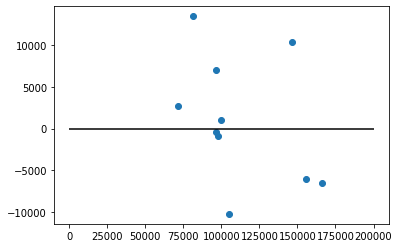

In [34]:
plt.scatter(y_test, (y_test - reg.predict(X_test)))
plt.hlines(y = 0, xmin = 0, xmax = 200000)

# Predict for unseen Dataset

In [35]:
evaluation

,State_Florida,State_New York,R&D Spend,Administration,Marketing Spend,Profit
0,0.0,0.0,28754.33,118546.05,172795.67,78239.91
1,0.0,1.0,114523.61,122616.84,261776.23,129917.04


In [36]:
evaluation_X = evaluation.drop('Profit', 1)
evaluation_X

,State_Florida,State_New York,R&D Spend,Administration,Marketing Spend
0,0.0,0.0,28754.33,118546.05,172795.67
1,0.0,1.0,114523.61,122616.84,261776.23


In [0]:
evaluation_y = evaluation.Profit

In [38]:
reg.score(evaluation_X, evaluation_y)

0.7576735087074449

In [39]:
reg.predict(evaluation_X)

array([[ 73752.4288435 ],
       [147336.34199933]])

In [40]:
evaluation_y

0     78239.91
1    129917.04
Name: Profit, dtype: float64

# Backward Elimination

In [0]:
!pip install scipy==1.2

     |████████████████████████████████| 26.6MB 1.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.1
    Uninstalling scipy-1.3.1:
      Successfully uninstalled scipy-1.3.1


In [0]:
import statsmodels.formula.api as sm

## Step-1

**first we need to create a constant column to get an intercept to our model because the model we are creating by statsmodel do not create intercept by default**

In [42]:
X = np.append(np.ones((len(X), 1)).astype(int), values = X, axis = 1)
X[:2]

array([[1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05]])

### optimal features for our model

In [43]:
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_opt[:1]

array([[1.000000e+00, 0.000000e+00, 1.000000e+00, 1.653492e+05,
        1.368978e+05, 4.717841e+05]])

## Create model with all variables

In [0]:
import statsmodels.formula.api as sm

In [0]:
sm.ols

In [0]:
def regressor_OLS(X_opt):
  import statsmodels.formula.api as sm
  regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
  print(regressor_OLS.summary())
  return regressor_OLS

In [49]:
regressor_OLS(X_opt)

TypeError: ignored

## Step-3:
  

**Drop feature with highest p value greater than Significance Leval(SL)**

In [0]:
X_opt = X[:, [0, 2, 3, 4, 5]]
regressor_OLS(X_opt)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           4.47e-28
Time:                        14:58:06   Log-Likelihood:                -503.44
No. Observations:                  48   AIC:                             1017.
Df Residuals:                      43   BIC:                             1026.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.009e+04   6637.013      7.547      0.0

In [0]:
X_opt = X[:, [0, 3, 4, 5]]
opt_regressor = regressor_OLS(X_opt)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     301.0
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           2.50e-29
Time:                        14:58:07   Log-Likelihood:                -503.50
No. Observations:                  48   AIC:                             1015.
Df Residuals:                      44   BIC:                             1022.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.048e+04   6471.112      7.801      0.0

In [0]:
X_opt = X_opt[:, [0, 1, 3]]
opt_regressor = regressor_OLS(X_opt)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     457.4
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           1.25e-30
Time:                        14:58:08   Log-Likelihood:                -503.72
No. Observations:                  48   AIC:                             1013.
Df Residuals:                      45   BIC:                             1019.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.677e+04   2678.544     17.462      0.0

## Adjusted R^2

In [0]:
opt_regressor.rsquared_adj

0.9510321185388474

#Backward Elimination by Recursive function

## by p value and significance level

In [0]:
def my_regressor_OLS_by_pvalue(X_opt, SL = 0.08):
  regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
  pvalues = regressor_OLS.pvalues
  adj_r2 = regressor_OLS.rsquared_adj
  if pvalues.max() > SL:
    max_pval_col = pvalues.argmax()
    X_opt = np.delete(X_opt, max_pval_col, 1)
    return my_regressor_OLS(X_opt)
  return regressor_OLS

In [0]:
opt_regressor_p = my_regressor_OLS_by_pvalue(X)

In [0]:
opt_regressor_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     457.4
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           1.25e-30
Time:                        15:14:31   Log-Likelihood:                -503.72
No. Observations:                  48   AIC:                             1013.
Df Residuals:                      45   BIC:                             1019.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.677e+04   2678.544     17.462      0.000    4.14e+04    5.22e+04
x1             0.8082      0.042     19.450      0.000       0.724       0.892
x2             0.0281      0.015      1.829      0.074      -0.003       0.059
==============================================================================
Omnibus:                       14.821   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.017
Skew:                          -0.917   Prob(JB):                     1.00e-05
Kurtosis:                       5.854   Cond. No.                     5.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## By only adjusted r_squared

when we eliminate feautres from our dataset then our model's adj_r2 increasing but when a certain threshold reached then it will start decreasing so the actual model is when the adj_r2 is higher

In [0]:
def my_regressor_OLS_by_adj_r2(X_opt,model = None, adj_r2 = 0):
  regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
  pvalues = regressor_OLS.pvalues
  adj_r2_now = regressor_OLS.rsquared_adj
  if adj_r2_now > adj_r2:
    max_pval_col = pvalues.argmax()
    X_opt = np.delete(X_opt, max_pval_col, 1)
    return my_regressor_OLS(X_opt,model = regressor_OLS, adj_r2 = adj_r2_now)
  return model

In [0]:
opt_regressor_adj_r2 = my_regressor_OLS_by_pvalue(X)
opt_regressor_adj_r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     457.4
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           1.25e-30
Time:                        15:15:21   Log-Likelihood:                -503.72
No. Observations:                  48   AIC:                             1013.
Df Residuals:                      45   BIC:                             1019.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.677e+04   2678.544     17.462      0.000    4.14e+04    5.22e+04
x1             0.8082      0.042     19.450      0.000       0.724       0.892
x2             0.0281      0.015      1.829      0.074      -0.003       0.059
==============================================================================
Omnibus:                       14.821   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.017
Skew:                          -0.917   Prob(JB):                     1.00e-05
Kurtosis:                       5.854   Cond. No.                     5.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By this we got that the most significan features are '**R & D spend** and **Marketing spend'**

# correlation matrix

In [0]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.243551,0.725514,0.974490
Administration,0.243551,1.000000,-0.033269,0.200467
Marketing Spend,0.725514,-0.033269,1.000000,0.747638
Profit,0.974490,0.200467,0.747638,1.000000


In [0]:
df.head(1)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.8,471784.1,New York,192261.83


By this we also got that the most significan features are '**R & D spend** and **Marketing spend'** with respect to profit

In [0]:
evaluation_X

array([[0.0000000e+00, 0.0000000e+00, 2.8754330e+04, 1.1854605e+05,
        1.7279567e+05],
       [0.0000000e+00, 1.0000000e+00, 1.1452361e+05, 1.2261684e+05,
        2.6177623e+05]])

In [0]:
evaluation_X = np.append(np.ones((len(evaluation_X), 1)).astype(int), values = evaluation_X, axis = 1)
evaluation_X[:2]

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.8754330e+04,
        1.1854605e+05, 1.7279567e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.1452361e+05,
        1.2261684e+05, 2.6177623e+05]])

remove columns 1, 2, 4

In [0]:
evaluation_X = np.delete(evaluation_X, [2, 4], 1)
evaluation_X

array([[1.0000000e+00, 0.0000000e+00, 2.8754330e+04, 1.7279567e+05],
       [1.0000000e+00, 0.0000000e+00, 1.1452361e+05, 2.6177623e+05]])

In [0]:
evaluation_X = np.delete(evaluation_X, [1], 1)
evaluation_X

array([[1.0000000e+00, 2.8754330e+04, 1.7279567e+05],
       [1.0000000e+00, 1.1452361e+05, 2.6177623e+05]])

In [0]:
y_evaluation_ols = opt_regressor.predict(evaluation_X)

In [0]:
y_evaluation_ols

array([ 74864.65802953, 146681.62609026])

In [0]:
evaluation_y

40     78239.91
15    129917.04
Name: Profit, dtype: float64

In [0]:
from sklearn.metrics import r2_score

In [0]:
r2_score(evaluation_y, y_evaluation_ols)

0.780984196841873